# Math 76 HW4, Fall 2025

**Name:**

For all plots, make sure to include a title, x-axis label, and y-axis label.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from hw4_helper_funcs import *

# Problem 1

Derive the expressions on p. 64 of the textbook coming from the statistical aspects of the Tikhonov solution given additive Gaussian white noise.  Specifically derive the equations for the covariance matrix and the expectation of the solution which introduces bias. 

**Response:** *(it may be easier to do this on paper and submit it alongside the notebook)*

## Answer for Part A: Expectation (Bias) of the Tikhonov Solution

We start with the statistical forward model and Tikhonov estimator:
$$
b \;=\; A x_{\text{exact}} + e, 
\qquad e \sim \mathcal N(0,\eta^2 I_m),
\qquad
x_\lambda \;=\; (A^\top A + \lambda^2 I)^{-1}A^\top b.
$$

Define the linear map
$$
L \;:=\; (A^\top A + \lambda^2 I)^{-1}A^\top
\quad\Rightarrow\quad
x_\lambda \;=\; L\,b.
$$

Taking expectation and using $\mathbb E[e]=0$,
$$
\mathbb E[x_\lambda]
\;=\; L\,\mathbb E[b]
\;=\; L (A x_{\text{exact}})
\;=\; (A^\top A + \lambda^2 I)^{-1}A^\top A\,x_{\text{exact}}.
$$

Introduce the (thin) SVD $A = U\Sigma V^\top$ so that $A^\top A = V\Sigma^2 V^\top$. Hence
$$
\mathbb E[x_\lambda]
\;=\; V(\Sigma^2 + \lambda^2 I)^{-1}\Sigma^2 V^\top x_{\text{exact}}.
$$

Define the filter factors
$$
\phi_i^{[\lambda]} \;:=\; \frac{\sigma_i^2}{\sigma_i^2 + \lambda^2},
\qquad i=1,\dots,n,
$$
and expand in the \(V\)-basis to obtain
$$
\mathbb E[x_\lambda]
\;=\; \sum_{i=1}^n \phi_i^{[\lambda]}\,(v_i^\top x_{\text{exact}})\,v_i.
$$

Hence, the estimator is biased toward zero in small $\sigma_i\$ directions, since
$$
\mathbb E[x_\lambda] - x_{\text{exact}}
\;=\; - \sum_{i=1}^n \frac{\lambda^2}{\sigma_i^2+\lambda^2}\,(v_i^\top x_{\text{exact}})\,v_i.
$$

Therefore, the expectation and bias can be shown as
$$
\boxed{
\mathbb E[x_\lambda]
\;=\; \sum_{i=1}^n \phi_i^{[\lambda]}\,(v_i^\top x_{\text{exact}})\,v_i,
\qquad
\text{Bias}[x_\lambda]
\;=\; - \sum_{i=1}^n \frac{\lambda^2}{\sigma_i^2+\lambda^2}\,(v_i^\top x_{\text{exact}})\,v_i.
}
$$


## Answer for Part B — Covariance of the Tikhonov Solution

Start from $x_\lambda = L b$ with $L = (A^\top A + \lambda^2 I)^{-1}A^\top$.  

Under white noise, $\mathrm{Cov}(b) = \eta^2 I_m\$. Therefore
$$
\mathrm{Cov}(x_\lambda)
\;=\; L\,\mathrm{Cov}(b)\,L^\top
\;=\; \eta^2\, L L^\top.
$$

Using the SVD $(A=U\Sigma V^\top)$, we have
$$
L \;=\; V(\Sigma^2+\lambda^2 I)^{-1}\Sigma U^\top
\quad\Rightarrow\quad
L L^\top
\;=\; V(\Sigma^2+\lambda^2 I)^{-1}\Sigma^2(\Sigma^2+\lambda^2 I)^{-1}V^\top.
$$

Thus, in the \(V\)-basis the covariance is diagonal with entries
$$
\frac{\sigma_i^2}{(\sigma_i^2+\lambda^2)^2}
\;=\; \frac{(\phi_i^{[\lambda]})^2}{\sigma_i^2},
\qquad i=1,\dots,n.
$$

Hence,
$$
\boxed{
\mathrm{Cov}(x_\lambda)
\;=\; \eta^2 \sum_{i=1}^n \frac{\sigma_i^2}{(\sigma_i^2+\lambda^2)^2}\; v_i v_i^\top
\;=\; \eta^2 \sum_{i=1}^n \bigl(\phi_i^{[\lambda]}\bigr)^2\,\sigma_i^{-2}\; v_i v_i^\top.
}
$$

The largest eigenvalue of $\mathrm{Cov}(x_\lambda)/\eta^2$ =
$\max_i \sigma_i^2/(\sigma_i^2+\lambda^2)^2 \le 1/(4\lambda^2)$, so
$$
\boxed{
\|\mathrm{Cov}(x_\lambda)\|_2 \;\le\; \frac{\eta^2}{4\lambda^2}.
}
$$


# Problem 4.4 (From Oversmoothing to Undersmoothing)

## Part A
Use the `deriv2` function to generate the test problem (set $n = 32$). Then use the function `csvd` to compute the SVD of $A$, and inspect the singular singular values.



(32, 32)
(32, 32)
A shape: (32, 32)
Rank: 32
Num of signular values returned: 32


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


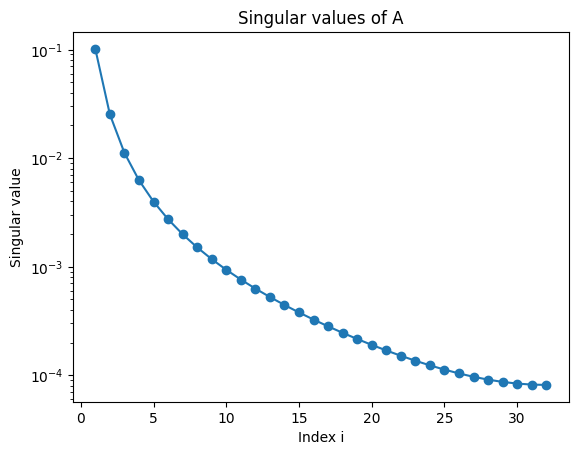

In [8]:
### Generate the test problem and computed the SVD
n = 32
A, b_exact, x_true = deriv2(n)

U, s, V = csvd(A)

print(U.shape)
print(V.shape)
print("A shape:", A.shape)
print("Rank:", np.linalg.matrix_rank(A))
print("Num of signular values returned:", len(s))

plt.figure()
plt.semilogy(np.arange(1, len(s)+1), s, marker='o')
plt.xlabel("Index i")
plt.ylabel("Singular value")
plt.title("Singular values of A")
plt.show()



## Part B

Add a small amount of noise to the right hand side, e.g., 
$$
\texttt{e = 1e-3*\texttt{np.random.normal(size=len(b))}}
$$
This noise is certainly not visible when plotting the right-hand side vector, but it is very significant with respect to the regularization. For a number of different regularization parameters $\lambda$ in the range $10^{-3}$ to $1$, compute the corresponding filter factors $\varphi_i^{[\lambda]}$ using the function `fil_fac`, as well as the corresponding Tikhonov solution $x_{\lambda}$ by means of
$$
\texttt{X = tikhonov(U, s, V, b, lambdah)}.
$$
For each $\lambda$, plot both the filter factors and the solution, and comment on your results. Use a logarithmic distribution of $\lambda$-values using `matplotlib`'s `semilogy()` function.

In [10]:
### Add a small amount of noise
e = 1e-3 * np.random.normal(size=len(b_exact))
b_noisy = b_exact + e

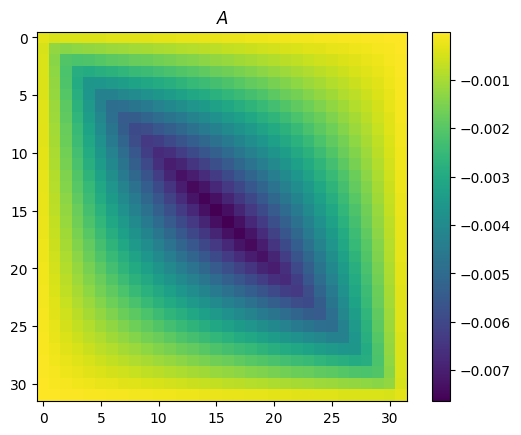

In [11]:
plt.imshow(A)
plt.colorbar()
plt.title("$A$")
plt.show()

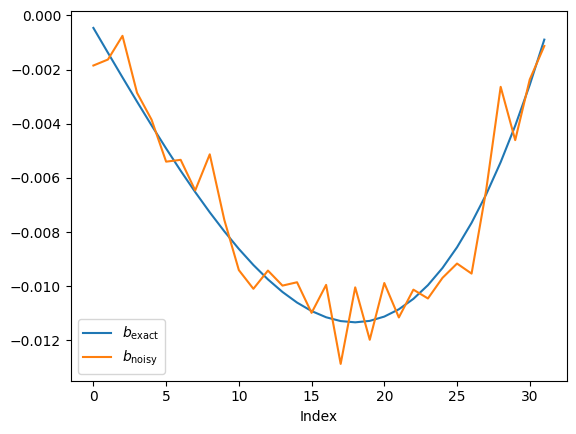

In [12]:
plt.plot(b_exact, label="$b_{\\text{exact}}$")
plt.plot(b_noisy, label="$b_{\\text{noisy}}$")
plt.xlabel("Index")
plt.legend()
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
C:\Users\sharp\AppData\Local\Temp\ipykernel_29864\836922243.py:13: SyntaxWarning: invalid escape sequence '\l'
  axs[j,0].set_ylabel("$\\varphi_i^{\lambda}$")


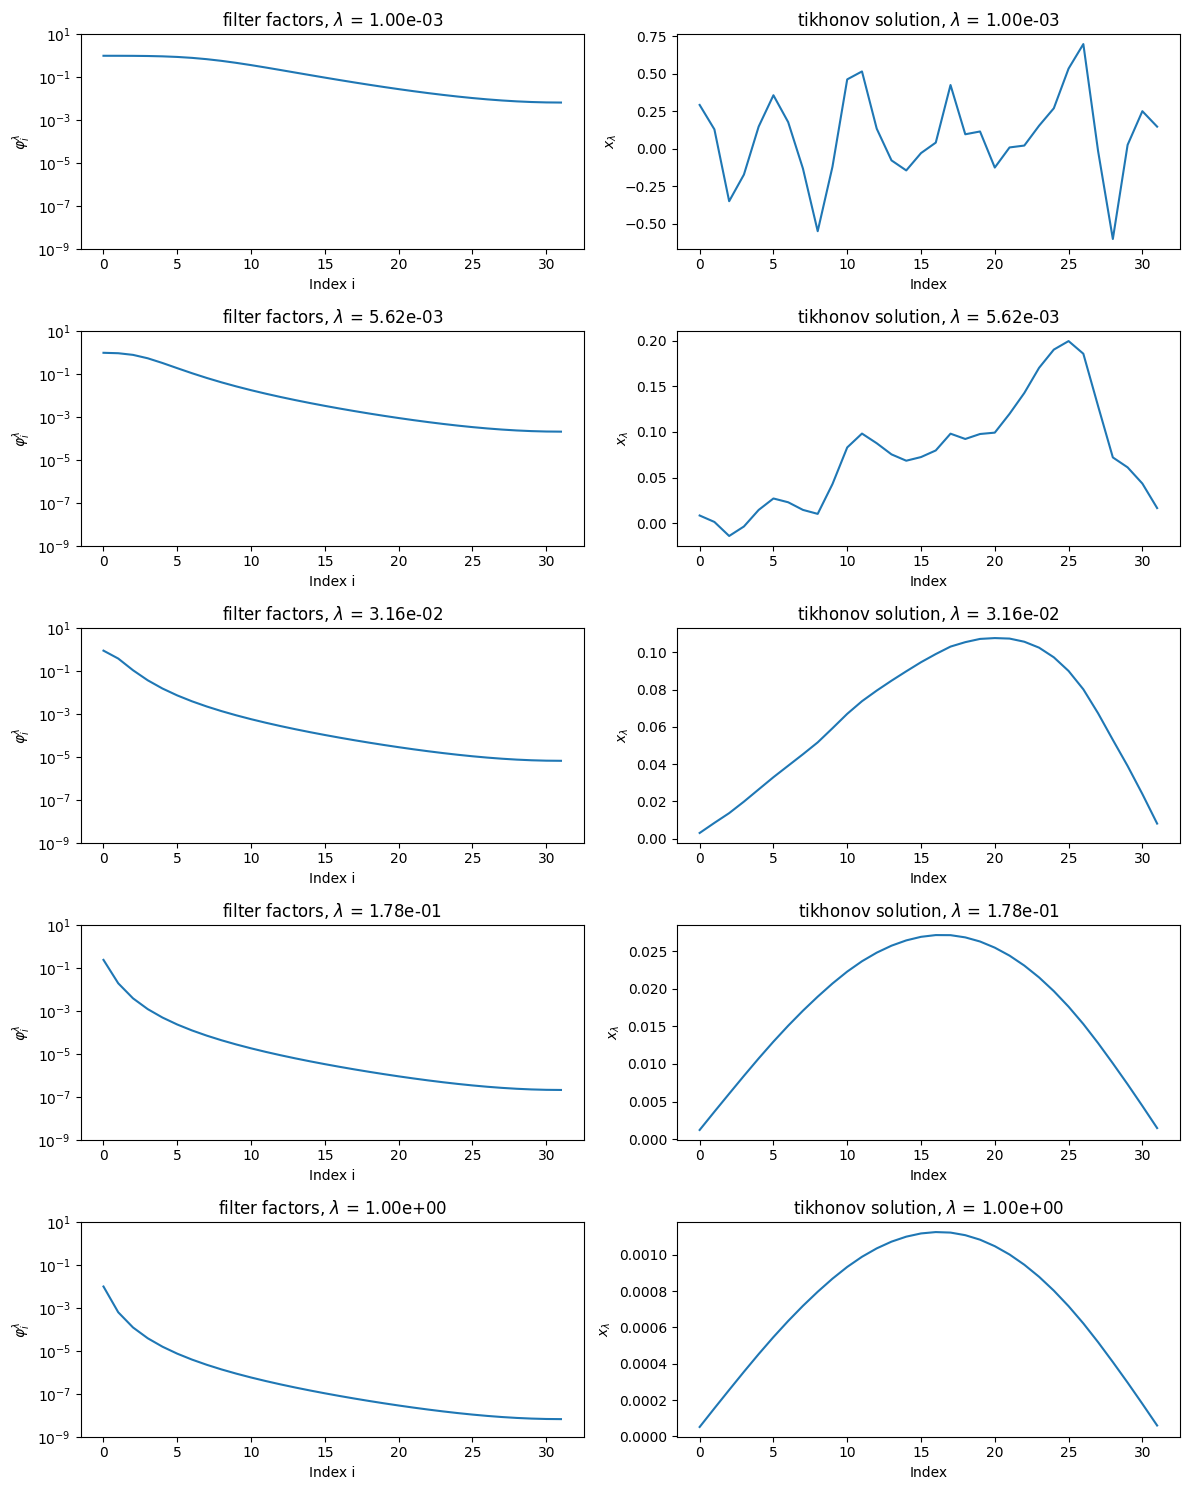

In [13]:
n_lambdahs = 5
lambdahs = np.logspace(-3, 0, num=n_lambdahs) ### Choose values of lambdah generated using np.logspace

fig, axs = plt.subplots(n_lambdahs,2,figsize=(12,15))

for j in range(n_lambdahs):

    lambdah = lambdahs[j]
    filtered_factors = fil_fac(s, [lambdah])
    axs[j,0].semilogy(filtered_factors)
    axs[j,0].set_title(f"filter factors, $\\lambda$ = {lambdah:.2e}")
    axs[j,0].set_xlabel("Index i")
    axs[j,0].set_ylabel("$\\varphi_i^{\lambda}$")
    axs[j,0].set_ybound(1e-9, 1e1)

    x_lambdah, _, _ = tikhonov(U, s, V, b_noisy, lambdahs[j])
    axs[j,1].plot(x_lambdah)
    axs[j,1].set_title(f"tikhonov solution, $\\lambda$ = {lambdahs[j]:.2e}")
    axs[j,1].set_xlabel("Index")
    axs[j,1].set_ylabel("$x_{\\lambda}$")


fig.tight_layout()
plt.show()

**Response:** As $\lambda$ increase, the filter factors suppress more high-index modes and the solution transitions from noisy to smooth/biased. The best $\lambda$ is the one that damps the onset of noise without removing the essential structure. 

# Problem 4.6 (The L-curve)

This exercise illustrates the typical behavior of the L-curve for a discrete ill-posed problem, using the second-derivative test problem from Excercise 2.3. 


## Part A
Generate the test problem `deriv2` with $n = 64$, and add Gaussian white noise scaled such that $\| e \|_2/\| b_{\text{exact}} \|_2 = 10^{-2}$. Then use `l_curve` to plot the L-curves corresponding to the three different right-hand sides $b_{\text{exact}}$, $e$, and $b_{\text{exact}} + e$. What happens to the corner if you switch to lin-lin scale?

In [16]:
### Setup each test problem (there should be 3, one for each different RHS parameter)
n = 64
rel_noise = 1e-2

A, b_exact, x_true = deriv2(n)

rng = np.random.default_rng(0)
e_raw = rng.normal(size=b_exact.shape)
e = (rel_noise * np.linalg.norm(b_exact) / np.linalg.norm(e_raw)) * e_raw
b_noisy = b_exact + e

# 3 Test Problems

# (1) Exact RHS
x1_exact = x_true.ravel()
b1_exact =  b_exact.ravel()

#(2) Noise-only RHS
x2_exact = np.zeros_like(x1_exact)
b2_exact = e.ravel()

#(3) Noisy RHS
x3_exact = x_true.ravel()
b3_exact = b_noisy.ravel()


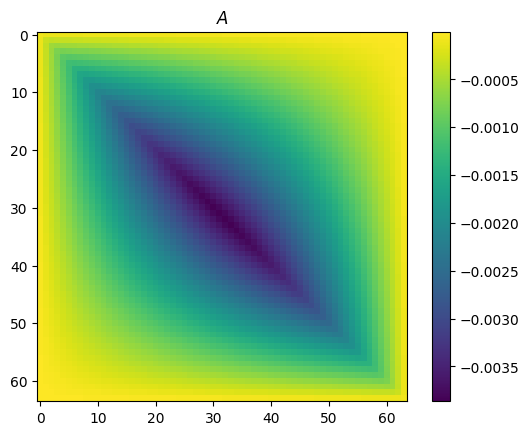

In [17]:
plt.imshow(A)
plt.colorbar()
plt.title("$A$")
plt.show()

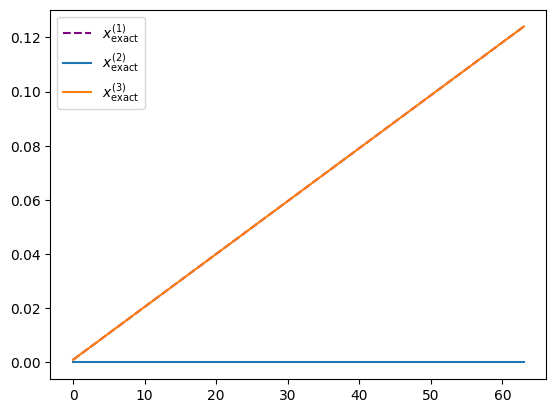

x1 and x3 should be overlapping


In [18]:
plt.plot(x1_exact, label="$x_{\\text{exact}}^{(1)}$", ls='--', color='purple')
plt.plot(x2_exact, label="$x_{\\text{exact}}^{(2)}$")
plt.plot(x3_exact, label="$x_{\\text{exact}}^{(3)}$")
plt.legend()
plt.show()
print("x1 and x3 should be overlapping")

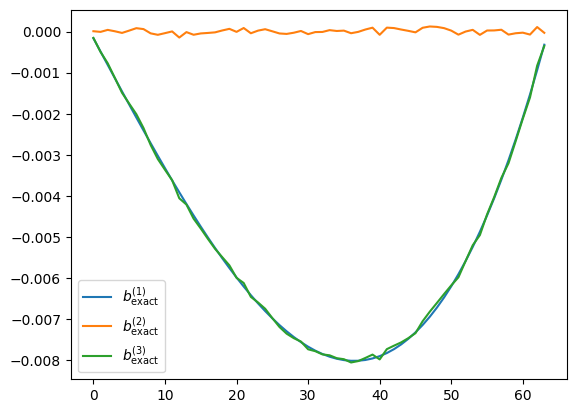

In [19]:
plt.plot(b1_exact, label="$b_{\\text{exact}}^{(1)}$")
plt.plot(b2_exact, label="$b_{\\text{exact}}^{(2)}$")
plt.plot(b3_exact, label="$b_{\\text{exact}}^{(3)}$")
plt.legend()
plt.show()

In [36]:
### Generate noisy perturbations for each RHS vector with the desired magnitude

def make_perturbation(b, rel_level, rng):

    e_raw = rng.normal(size=b.shape)
    nb = np.linalg.norm(b)
    ref = nb if nb > 0 else 1.0
    return (rel_level * ref / np.linalg.norm(e_raw)) * e_raw

b1_perturb = make_perturbation(b1_exact, rel_noise, rng)
b2_perturb = make_perturbation(b2_exact, rel_noise, rng)
b3_perturb = make_perturbation(b3_exact, rel_noise, rng)
    

# Add perturbations to the exact RHS's 
b1_noisy = b1_exact + b1_perturb
b2_noisy = b2_exact + b2_perturb
b3_noisy = b3_exact + b3_perturb

# Use csvd to get the SVD of A
U, s, V = csvd(A)

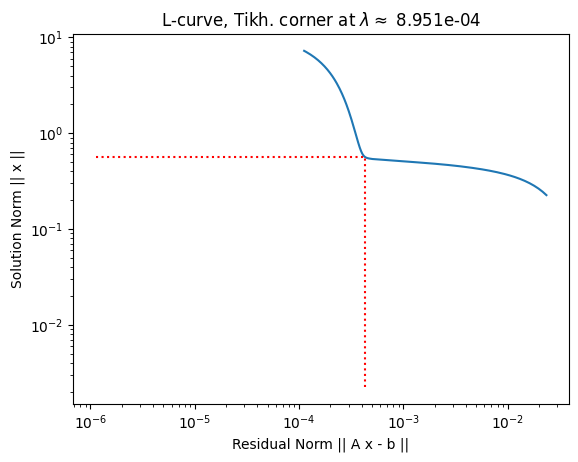

In [38]:
# Plot L-curves for the first RHS
reg_corner1, rho1, eta1, reg_param1 = l_curve(U, s, b1_noisy)

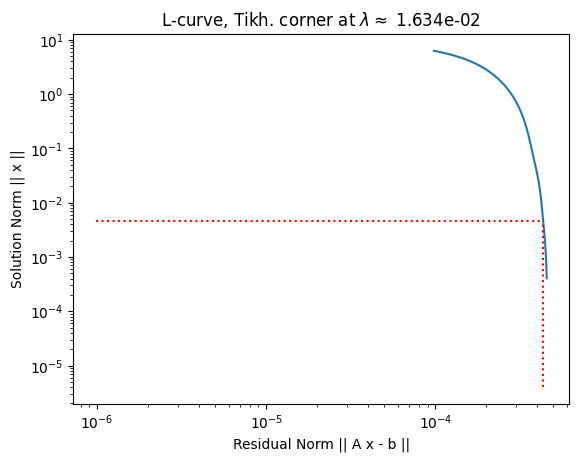

In [40]:
# Plot L-curves for the second RHS
reg_corner2, rho2, eta2, reg_param2 = l_curve(U, s, b2_noisy)

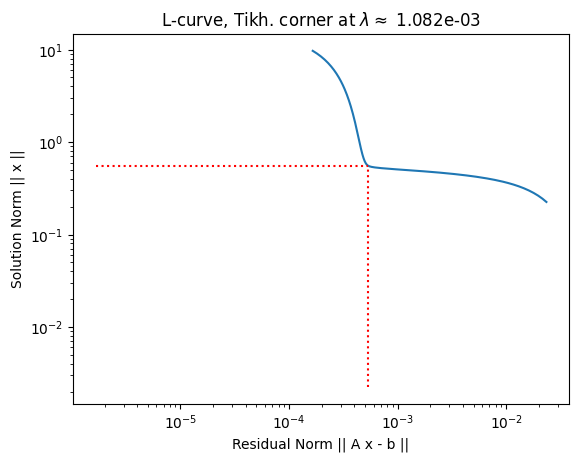

In [42]:
# Plot L-curves for the third RHS
reg_corner3, rho3, eta3, reg_param3 = l_curve(U, s, b3_noisy)

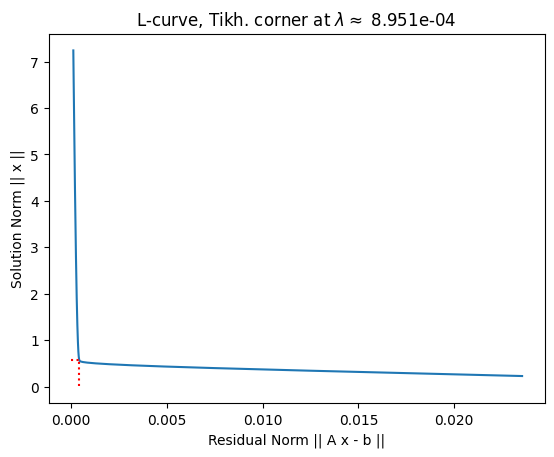

In [44]:
# Plot L-curve for the first RHS again, but use linear-linear scale instead.
reg_corner1, rho1, eta1, reg_param1 = l_curve(U, s, b1_noisy)

# Include these three lines below to change scaling to linear-linear
ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

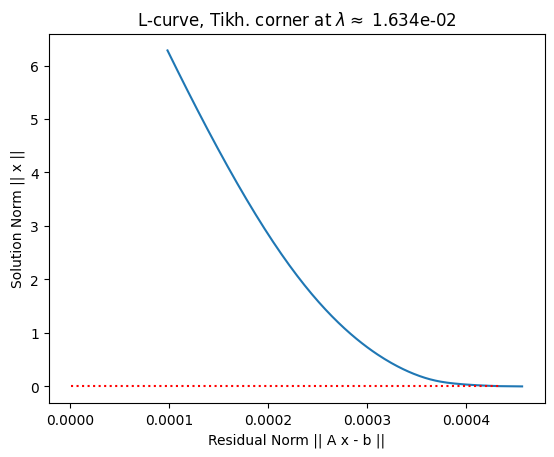

In [46]:
# Plot L-curve for the second RHS again, but use linear-linear scale instead.
reg_corner2, rho2, eta2, reg_param2 = l_curve(U, s, b2_noisy)

# Include these three lines below to change scaling to linear-linear
ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

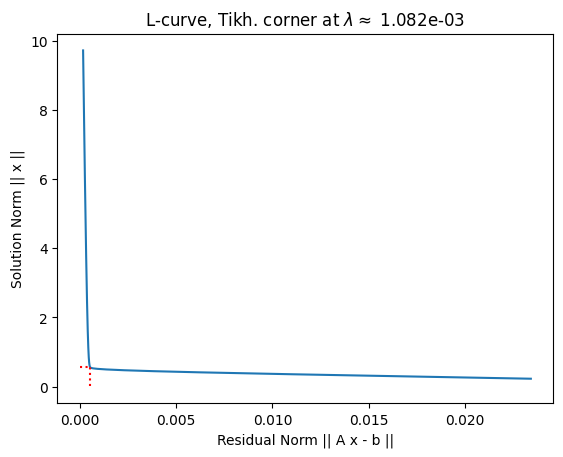

In [48]:
# Plot L-curve for the third RHS again, but use linear-linear scale instead.
reg_corner3, rho3, eta3, reg_param3 = l_curve(U, s, b3_noisy)

# Include these three lines below to change scaling to linear-linear
ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

**Response:** Since $\|Ax-b\|$ and $\|x\|$ span several orders of magnitude, log-log axes spread the small values and compress the large ones. Log-log is also scale invariant, whereas on lin-lin most points collapse near the axes and the corner becomes flattened and unreliable. *The second RHS is pure noise so there is no signal dominated regime where decrease $\lambda$ both fits the data better and keeps $\| x_{\lambda} \|$ moderate.

## Part B

Switch back to log-log scale and add a horizontal line at $\| x_{\text{exact}} \|_2$, the norm of the exact solution, and a vertical line at $\|e\|_2$, the norm of the perturbation. Relate the positions of these lines to the different parts of the L-curve. 

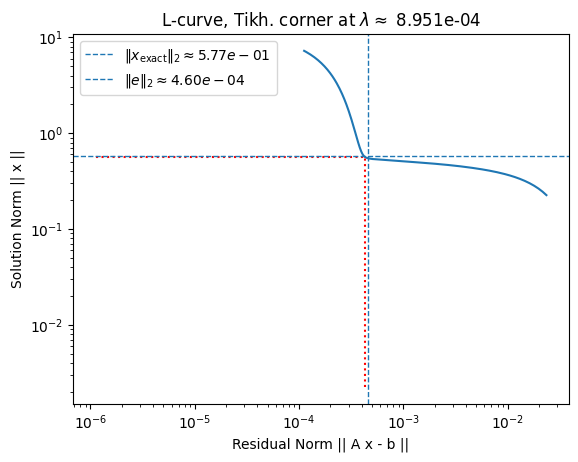

In [62]:
# Get norm of x_exact and perturbation corresponding to first RHS
x1_exact_norm = np.linalg.norm(x1_exact)
b1_perturb_norm = np.linalg.norm(b1_perturb)

# L-curve for the first RHS
reg_corner1, rho1, eta1, reg_param1 = l_curve(U, s, b1_noisy)

# Get current axis
ax = plt.gca()

### Plot horizontal line at x1_exact (hint: use the axhline)
ax.axhline(x1_exact_norm, ls='--', lw=1, label=rf"$\|x_{{\mathrm{{exact}}}}\|_2 \approx {x1_exact_norm:.2e}$")


### Plot vertical line at x1_exact (hint: use the axvline)
ax.axvline(b1_perturb_norm, ls='--', lw=1, label=rf"$\|e\|_2 \approx {b1_perturb_norm:.2e}$")


# Add legend
ax.legend()

plt.show()

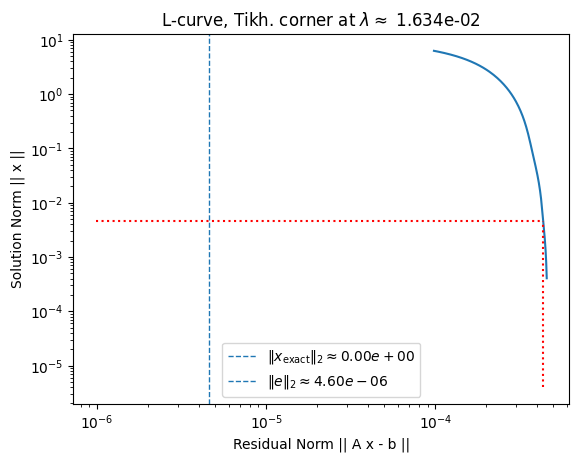

In [66]:
# Get norm of x_exact and perturbation corresponding to third RHS
x2_exact_norm = np.linalg.norm(x2_exact)
b2_perturb_norm = np.linalg.norm(b2_perturb)

# L-curve for the first RHS
reg_corner2, rho2, eta2, reg_param2 = l_curve(U, s, b2_noisy)

# Get current axis
ax = plt.gca()

### Plot horizontal line at x2_exact (hint: use the axhline)
ax.axhline(x2_exact_norm, ls='--', lw=1, label=rf"$\|x_{{\mathrm{{exact}}}}\|_2 \approx {x2_exact_norm:.2e}$")

### Plot vertical line at x2_exact (hint: use the axvline)
ax.axvline(b2_perturb_norm, ls='--', lw=1, label=rf"$\|e\|_2 \approx {b2_perturb_norm:.2e}$")


# Add legend
ax.legend()

plt.show()

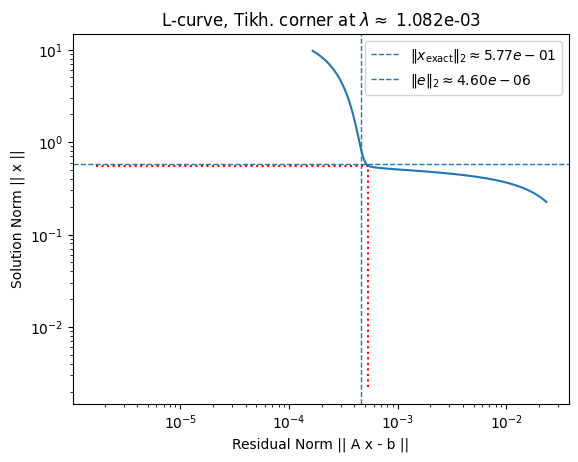

In [68]:
# Get norm of x_exact and perturbation corresponding to third RHS
x3_exact_norm = np.linalg.norm(x3_exact)
b3_perturb_norm = np.linalg.norm(b3_perturb)

# L-curve for the third RHS
reg_corner3, rho3, eta3, reg_param3 = l_curve(U, s, b3_noisy)

# Get current axis
ax = plt.gca()

### Plot horizontal line at x3_exact (hint: use the axhline)
ax.axhline(x3_exact_norm, ls='--', lw=1, label=rf"$\|x_{{\mathrm{{exact}}}}\|_2 \approx {x3_exact_norm:.2e}$")


### Plot vertical line at x3_exact (hint: use the axvline)
ax.axvline(b3_perturb_norm, ls='--', lw=1, label=rf"$\|e\|_2 \approx {b2_perturb_norm:.2e}$")

# Add legend
ax.legend()

plt.show()

**Response:** More noise shift the elbow to larger $\lambda$. The vertical $\|e\|_2$ line marks the residual floor and the horizontal $\|x_{{\mathrm{{exact}}}}\|_2$ line marks a resonable solution scale. The elbow near their intersection is a justifiable choice for $\lambda$.

## Part C

Find (by trial and error) a Tikhonov regularization parameter $\lambda^*$ that approximately minimizes the error $\| x_{\text{exact}} - x_{\lambda} \|_2$ between the exact solution $x_{\text{exact}}$ and the regularized solution $x_{\lambda}$. Add the point $(\| A x_{\lambda^*}  - b\|_2, \| x_{\lambda^*} \|_2)$ to the L-curve (it must lie on the L-curve corresponding to $b$). Is it near the corner? (Note: here $b$ denotes the noisy RHS data vector, *not* the noiseless RHS vector)

In [34]:
### Write some code / use trial/error to minimize || x_exact - x_lambda ||_2 for the first RHS

opt_lambdah1 = ### Your optimal lambdah
xopt1 = ### Your guess

SyntaxError: invalid syntax (1686622374.py, line 3)

In [ ]:
### Write some code / use trial/error to minimize || x_exact - x_lambda ||_2 for the second RHS

opt_lambdah2 = ### Your optimal lambdah
xopt2 = ### Your guess

In [ ]:
### Write some code / use trial/error to minimize || x_exact - x_lambda ||_2 for the third RHS

opt_lambdah3 = ### Your optimal lambdah
xopt3 = ### Your guess

In [ ]:
### Remake plot for the first RHS, adding the point (|| A x_lambda - b||_2, ||x_lambda||_2) to the graph

# Get norm of x_exact and perturbation corresponding to first RHS
x1_exact_norm = np.linalg.norm(x1_exact)
b1_perturb_norm = np.linalg.norm(b1_perturb)

# L-curve for the first RHS
reg_corner1, rho1, eta1, reg_param1 = l_curve(U, s, b1_noisy)

# Get current axis
ax = plt.gca()

### Plot horizontal line at x1_exact (hint: use the axhline)


### Plot vertical line at x1_exact (hint: use the axvline)


### Add the point (|| A x_lambda - b||_2, ||x_lambda||_2) to the graph



# Add legend
ax.legend()

plt.show()

In [ ]:
### Remake plot for the second RHS, adding the point (|| A x_lambda - b||_2, ||x_lambda||_2) to the graph

# Get norm of x_exact and perturbation corresponding to first RHS
x2_exact_norm = np.linalg.norm(x2_exact)
b2_perturb_norm = np.linalg.norm(b2_perturb)

# L-curve for the first RHS
reg_corner2, rho2, eta2, reg_param2 = l_curve(U, s, b2_noisy)

# Get current axis
ax = plt.gca()

### Plot horizontal line at x2_exact (hint: use the axhline)


### Plot vertical line at x2_exact (hint: use the axvline)


### Add the point (|| A x_lambda - b||_2, ||x_lambda||_2) to the graph



# Add legend
ax.legend()

plt.show()

In [ ]:
# ### Remake plot for the third RHS, adding the point (|| A x_lambda - b||_2, ||x_lambda||_2) to the graph

# # Get norm of x_exact and perturbation corresponding to first RHS
# x3_exact_norm = np.linalg.norm(x3_exact)
# b3_perturb_norm = np.linalg.norm(b3_perturb)

# # L-curve for the first RHS
# reg_corner3, rho3, eta3, reg_param3 = l_curve(U, s, b3_noisy)

# # Get current axis
# ax = plt.gca()

# ### Plot horizontal line at x3_exact (hint: use the axhline)


# ### Plot vertical line at x3_exact (hint: use the axvline)


# ### Add the point (|| A x_lambda - b||_2, ||x_lambda||_2) to the graph



# # Add legend
# ax.legend()

# plt.show()

**Response:**

# Problem 4.7 (Limitations of TSVD and Tikhonov Methods)

This exercise illustrates one of the limitations of TSVD and Tikhonov solutions, namely, that they are not so well suited for computing regularized solutions when the exact solution is discontinuous. We use the model problem `wing`, whose solution has has two discontinuities. Since we are mainly interested in the approximation properties of the TSVD and Tikhonov solutions, we do not add any noise in this exercise. 

## Part A

Generate the model problem using `wing`, plot the exact solution, and notice its form. Compute TSVD and Tikhonov solutions for various regularization parameters. Monitor the solutions and try to find the "best" value of $k$ and $\lambda$. Notice how difficult it is to reconstruct the discontinuities. 

In [ ]:
# Define wing problem
A, b, x = wing(32)

# Use csvd to get the SVD of A
U, s, V = csvd(A)

In [ ]:
plt.imshow(A)
plt.colorbar()
plt.title("$A$")
plt.show()

In [ ]:
plt.plot(x)
plt.title("$x$")
plt.xlabel("Index")
plt.show()

In [ ]:
plt.plot(b)
plt.title("$b$")
plt.xlabel("Index")
plt.show()

In [ ]:
### Try to find the best value of k in the TSVD



In [ ]:
### Try to find the best value of \lambda in the Tikhonov problem



**Response:**